In [63]:
### importing modules
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import random

In [64]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))

def hidden(X, W_1, b):
    return sigmoid(np.dot(W_1, X) + b)

def output(H, W_2, b):
    return sigmoid(np.dot(W_2.T, H) + b)

def delta_2(o, y):
    return ((o - y) * o * (1 - o)).item()

def delta_1(h, W_2, d2):
    d1 = np.zeros(shape=(3, 1))
    for j in range(d1.shape[0]):
        d1[j] = W_2[j] * d2 * h[j] * (1 - h[j])
    return d1

def dJdW_2(h, d2):
    dj = np.zeros(shape=(3, 1))
    for j in range(dj.shape[0]):
        dj[j] = h[j] * d2
    return dj

def dJdW_1(X, d1):
    dj = np.zeros(shape=(3, 2))
    for j in range(dj.shape[0]):
        for i in range(dj.shape[1]):
            dj[j, i] = (d1[j] * X[i]).item()
    return dj

In [65]:
### initializing parameters

X = np.random.standard_normal(size=(2, 1))
W_1 = np.random.standard_normal(size=(3, 2))
b_1 = np.random.standard_normal(size=(3, 1))
W_2 = np.random.standard_normal(size=(3, 1))
b_2 = random.normalvariate(mu=0, sigma=1)
y = random.normalvariate(mu=0, sigma=1)

### forward pass
h = hidden(X, W_1, b_1)
o = output(h, W_2, b_2)


In [66]:
d2, djdb_2 = delta_2(o, y), delta_2(o, y)
d1, djdb_1 = delta_1(W_2, h, d2), delta_1(W_2, h, d2)

In [67]:
dj2 = dJdW_2(h, d2)
dj1 = dJdW_1(X, d1)

In [68]:


def train_model(X, W_1, W_2, b_1, b_2, y, alpha):
    for i in range(y.shape[0]):
        #forward prop
        h = hidden(X[i].reshape(-1, 1), W_1, b_1)
        o = output(h, W_2, b_2)
        # back prop
        d2, djdb_2 = delta_2(o, y[i]), delta_2(o, y[i])
        d1, djdb_1 = delta_1(W_2, h, d2), delta_1(W_2, h, d2)
        dj2 = dJdW_2(h, d2)
        dj1 = dJdW_1(X[i].reshape(-1, 1), d1)
        W_1 -= alpha * dj1
        W_2 -= alpha * dj2
        b_1 -= alpha * djdb_1
        b_2 -= alpha * djdb_2
    
    return W_1, W_2, b_1, b_2

def predict_model(X, W_1, W_2, b_1, b_2, y):
    y_hat = []
    for i in range(X.shape[0]):
        h = hidden(X[i].reshape(-1, 1), W_1, b_1)
        o = output(h, W_2, b_2)
        y_hat.append(o.item())

    return y_hat


In [69]:
from sklearn.datasets import make_circles

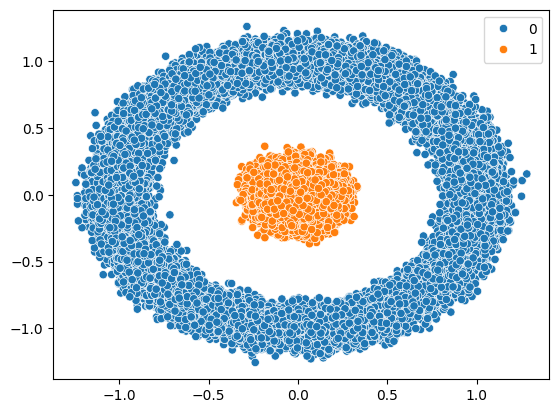

In [70]:
data, labels = make_circles(100000, noise=0.07, factor=0.1, random_state=42)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels)
plt.show()

In [71]:
from tqdm import tqdm
alpha = 0.001
epochs = 80
for i in tqdm(range(10)):
    W_1, W_2, b_1, b_2 = train_model(data, W_1, W_2, b_1, b_2, labels, alpha)
    y_hat = predict_model(data, W_1, W_2, b_1, b_2, labels)

100%|██████████| 10/10 [01:40<00:00, 10.03s/it]


In [72]:
y_hat = np.array(y_hat)
y_hat = np.where(y_hat > 0.5, 1, 0)

In [73]:
def accuracy(y_hat, y):
    good_pred = y_hat[y_hat == y]
    good_pred = np.ones_like(good_pred)
    return np.sum(good_pred) / len(y_hat)

In [74]:
accuracy(y_hat, labels)

0.53241

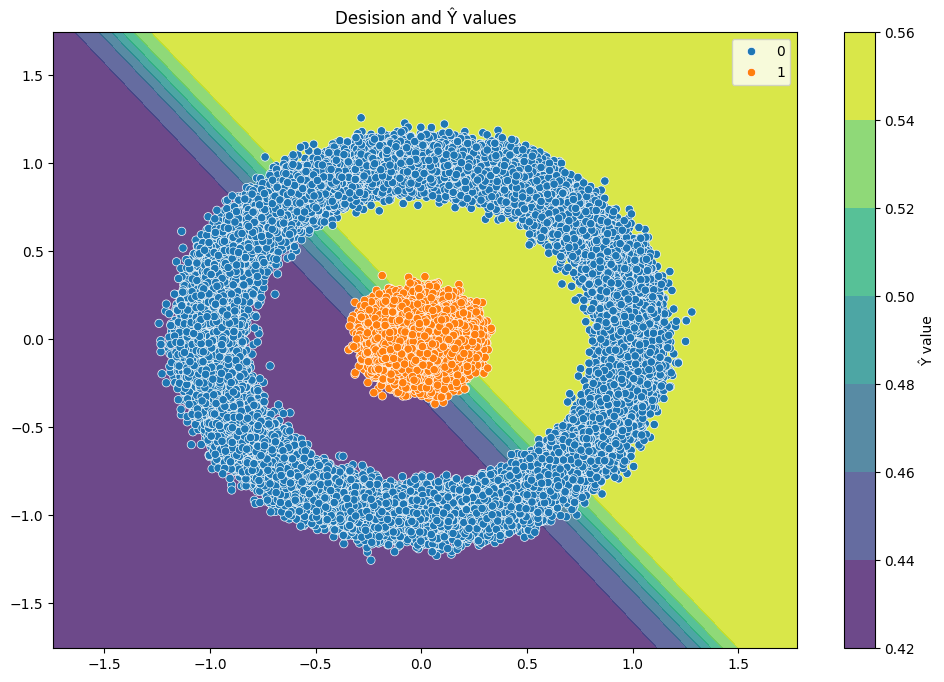

In [75]:
### vizualisation

plt.figure(figsize=(12, 8))
hh = .02
x_min, x_max = data[:, 0].min() - .5, data[:, 0].max() + .5
y_min, y_max = data[:, 1].min() - .5, data[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, hh), np.arange(y_min, y_max, hh))

Z = np.array(predict_model(np.c_[xx.ravel(), yy.ravel()], W_1, W_2, b_1, b_2, labels))
Z = Z.reshape(xx.shape)

contour = plt.contourf(xx, yy, Z, alpha=0.8)
sns.scatterplot(x=data[:, 0], y=data[:, 1], hue=labels)
plt.colorbar(contour, label="Ŷ value")
plt. title("Desision and Ŷ values")
plt.show()